<a href="https://colab.research.google.com/github/prottushee/k_means_elbow_alalysis/blob/main/week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K-Means Algorithm - Sirat E Afroz(2154901087)**

###Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

###Loading the dataset


In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')

In [ ]:
print(dataset)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


####**This dataset has details about 200 individual customers, including their ID numbers, gender, age, annual income (measured in thousands of dollars), and a spending score that ranges from 1 to 100, indicating how much they typically spend. It offers a simple but insightful look into customer demographics and shopping behaviors. By exploring this information, businesses can better understand different types of customers, group them based on their habits, and design more focused marketing strategies.**

##Selecting three features from the dataset: **Annual Income**, **Age** and **Spending Score**, which are used as the input variables for clustering. (2154901087)

In [ ]:
x = dataset.iloc[:,[2,3,4]].values
print(x)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

##**Apply K-Means**(2154901087)
###Annual Income, Age & Spending score
###range (1,21)

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,21):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) #kmeans++ initializtion strategy to place centroid
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
  print(wcss)

[269981.28000000014]
[269981.28000000014, 183653.3289473683]
[269981.28000000014, 183653.3289473683, 106348.37306211119]
[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198]
[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369]
[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947]
[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 33642.57922077922]
[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 33642.57922077922, 26686.837785187785]
[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 33642.57922077922, 26686.837785187785, 24766.471609793436]
[269981.28000000014, 183653.3289473683, 106348.37306211119, 73880.64496247198, 44448.45544793369, 40825.16946386947, 

 ###**Iteratively fits K-Means models with a varying number of clusters (from 1 to 7) and records the Within-Cluster Sum of Squares (WCSS) for each model. WCSS measures how tightly the data points in a cluster are grouped around their respective centroids—a lower WCSS indicates tighter clusters.** (2154901087)



*   wcss = []
Initializes an empty list called wcss which will be used to store the Within-Cluster Sum of Squares (WCSS) values for different numbers of clusters. WCSS measures how close the data points in a cluster are to the cluster center.
*   for i in range(1, 8):
Starts a for loop that iterates over the number of clusters, starting from 1 to 7. This loop will test the K-Means algorithm with a different number of clusters in each iteration.

* kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
Creates a KMeans object for the current iteration with i clusters.

* n_clusters=i: Specifies the current number of clusters.

* init='k-means++': Uses the K-Means++ initialization, which helps to place the initial centroids more efficiently, reducing the chances of poor clustering results.

* random_state=42: Ensures reproducibility. Setting the same random seed will produce the same results every time the code runs.

* kmeans.fit(x)
Fits the K-Means model to the dataset x (which contains the selected features: Age and Spending Score). This step performs the clustering.

* wcss.append(kmeans.inertia_)
Appends the inertia (which is the WCSS) of the current model to the wcss list.

* kmeans.inertia_ is a built-in attribute that stores the WCSS for the fitted model. Lower inertia means tighter clusters.



###**Using the Elbow Method to find out the Optimal number of clusters** (2154901087)

Text(0, 0.5, 'WCSS')

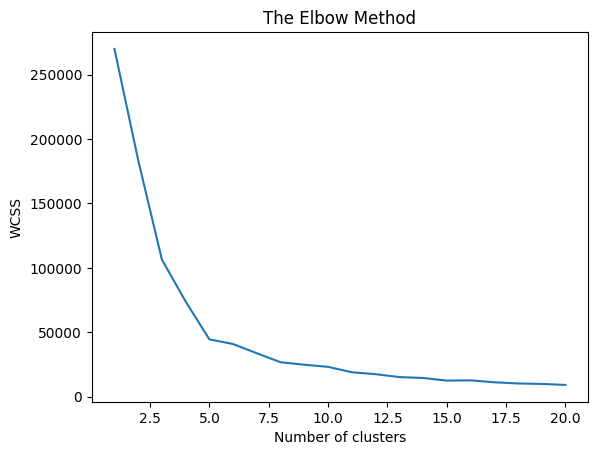

In [ ]:
plt.plot(range(1,21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

* The y-axis represents the Within-Cluster Sum of Squares (WCSS), which measures the total distance between each point and the centroid of its assigned cluster.

* The x-axis represents the number of clusters used in the K-Means algorithm.

* The graph shows that as the number of clusters increases, the WCSS decreases. This is expected because more clusters generally lead to points being closer to their centroids.

Initially, adding clusters significantly reduces the WCSS. But, after a certain point, the reduction in WCSS becomes minimal with the addition of each new cluster. This point is called the "elbow point".

In the graph, **the elbow seems to appear around 4 clusters**.

This means that using 4 clusters is likely optimal because increasing beyond this point gives very little improvement in cluster tightness while increasing model complexity.

###From the plot, **the elbow is around k = 5**, suggesting that **5 clusters** is a good choice for segmenting the data based on Annual Income, Age, and Spending Score.

###Applying K-Means clustering on the dataset using **Annual Income** and **Spending Score** (i.e., dataset.iloc[:, [3, 4]]), and WCSS for cluster numbers ranging from 1 to 20 is plotted.

##**Interpreting This Elbow Plot:**
###The graph shows a sharp decline in WCSS up to around k = 5, then the curve starts to flatten. This suggests that **5 clusters** is the optimal choice — the "elbow point".
###After 5, adding more clusters only gives minor improvements in compactness (WCSS), so it’s not worth the added complexity.
